In [1]:
# Enable code formatting using external plugin: nb_black.
%reload_ext nb_black

<IPython.core.display.Javascript object>

# Matplotlib Tutorial - PART 2

**Ref: [Matplotlib Tutorials][1] by [Corey Schafer][2]**

[1]: https://youtube.com/playlist?list=PL-osiE80TeTvipOqomVEeZ1HRrcEvtZB_
[2]: https://coreyms.com/

### Import `matplotlib` and other required libraries

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

print("Matplotlib version: ", matplotlib.__version__)

Matplotlib version:  3.4.3


<IPython.core.display.Javascript object>

### Bar Chart

`plt.plot()` uses _Line plot_ by default. To plot the values as a _Bar chart_ use `plt.bar()`.

#### Single Bar Chart

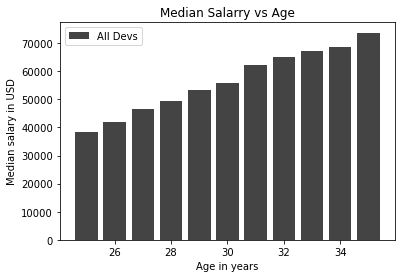

<IPython.core.display.Javascript object>

In [3]:
age_x = [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]
sal_y = [38496, 42000, 46752, 49320, 53200, 56000, 62316, 64928, 67317, 68748, 73752]  # All devs salary

# Plot "Median Salarry vs Age" Bar graph for devs.
plt.bar(age_x, sal_y, color="#444444", label="All Devs")

plt.xlabel("Age in years")
plt.ylabel("Median salary in USD")
plt.title("Median Salarry vs Age")
plt.legend()

plt.show()

#### Multiple Bar Chart

In `matplotlib` there is **no native support to display multiple _Bar Charts_** adjacently, instead they are **stacked on top of each other**. 

To plot multiple _Bar Charts_ adjacently we have to offset the _x-axis_ values of each plot. The offset values must be proportional to the width of the _Bar_. Since we need three bars 
```
| -ve offset | Bar width  | +ve offset |
|            |            |            |
|------------|------------|------------|
   Left Bar    Center Bar   Right Bar
```

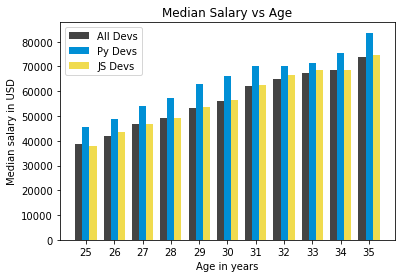

<IPython.core.display.Javascript object>

In [4]:
age_x = [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]  # Developers age range.
sal_y = [38496, 42000, 46752, 49320, 53200, 56000, 62316, 64928, 67317, 68748, 73752]  # All devs salary.
py_sal_y = [45372, 48876, 53850, 57287, 63016, 65998, 70003, 70000, 71496, 75370, 83640]  # Python devs salary.
js_sal_y = [37810, 43515, 46823, 49293, 53437, 56373, 62375, 66674, 68745, 68746, 74583]  # JS devs salary.

bar_width = 0.25  # Set custom bar width.

n_offset = np.array(age_x) - bar_width  # Negative offset.
plt.bar(n_offset, sal_y, width=bar_width, color="#444444", label="All Devs")  # All developers plot.

plt.bar(age_x, py_sal_y, width=bar_width, color="#008FD5", label="Py Devs")  # Python developers plot.

p_offset = np.array(age_x) + bar_width  # Positive offset.
plt.bar(p_offset, js_sal_y, width=bar_width, color="#F0DB4F", label="JS Devs")  # JavaScript developers plot.

plt.xlabel("Age in years")
plt.ylabel("Median salary in USD")
plt.title("Median Salary vs Age")
plt.xticks(ticks=age_x, labels=age_x)
plt.legend()

plt.show()

### Load sample data from a csv file using `pandas` library

In [5]:
df = pd.read_csv("./data.csv", index_col="Responder_id")

rows, cols = df.shape

print("Number of rows:", rows)
print("Number of columns:", cols)

df.head(3)

Number of rows: 87569
Number of columns: 1


,LanguagesWorkedWith
Responder_id,
1,HTML/CSS;Java;JavaScript;Python
2,C++;HTML/CSS;Python
3,HTML/CSS


<IPython.core.display.Javascript object>

#### Plot a _Bar Chart_ for top programming languages

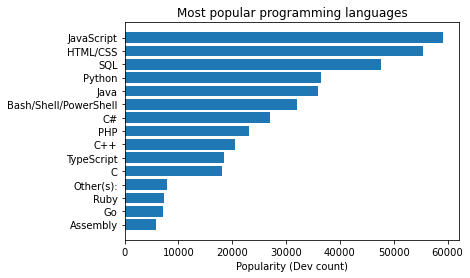

<IPython.core.display.Javascript object>

In [16]:
from collections import Counter

lang_count = Counter()
df["LanguagesWorkedWith"].apply(lambda skills: lang_count.update(skills.split(";")))

# Pick top 15 most common programming languages and plot a Bar Chart.
x_vals, y_vals = zip(*lang_count.most_common(15))

# Reverse tupels to show most mopular at the top.
x_vals = x_vals[::-1]
y_vals = y_vals[::-1]

plt.barh(x_vals, y_vals)

plt.title("Most popular programming languages")
plt.xlabel("Popularity (Dev count)")

plt.show()